#КЛАССИФИКАЦИЯ

#ИМПОРТЫ

In [ ]:
#Общий
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go


#Preprocesing
from sklearn.preprocessing import LabelEncoder # coding cat. features
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV)#подбор гиперпараметров методом сетки

#ML classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import (GaussianNB,BernoulliNB,MultinomialNB)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#metrics
from sklearn.metrics import (confusion_matrix,#matrix of errors
                             accuracy_score,#точность
                             precision_score,#способность классифицировать конкретный класс
                             recall_score,#полнота алгоритма
                             f1_score,#средневзвешенная
                             roc_auc_score,
                             roc_curve,
                             auc)

#pickle для сохранения и загрузки из файлов



#балансировка





#Загрузка данных

In [ ]:
!git clone https://github.com/Lasttrader/DA_repo

Cloning into 'DA_repo'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 69 (delta 3), reused 1 (delta 0), pack-reused 58 (from 1)
Receiving objects: 100% (69/69), 31.82 MiB | 6.24 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Updating files: 100% (26/26), done.


In [ ]:
path = '/content/DA_repo/bank.csv'

In [ ]:
data = pd.read_csv(path,sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
data['y'].value_counts()

,count
y,
no,4000
yes,521


#АНАЛИЗ ДАННЫх

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
#числовые признаки
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
#категориальные признаки
data.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


#Обработка категориальных признаков

In [ ]:
cat_cols = data.describe(include = 'object').columns.to_list()
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
cat_data = data[cat_cols]
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


In [ ]:
#кодирование катег. признаков

le = LabelEncoder()

for i in cat_cols:
    cat_data[i+'_LE'] = le.fit_transform(cat_data[i])

cat_data.head()

/tmp/ipython-input-12-1111566119.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i+'_LE'] = le.fit_transform(cat_data[i])
/tmp/ipython-input-12-1111566119.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i+'_LE'] = le.fit_transform(cat_data[i])
/tmp/ipython-input-12-1111566119.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,job,marital,education,default,housing,loan,contact,month,poutcome,y,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,contact_LE,month_LE,poutcome_LE,y_LE
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no,10,1,0,0,0,0,0,10,3,0
1,services,married,secondary,no,yes,yes,cellular,may,failure,no,7,1,1,0,1,1,0,8,0,0
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no,4,2,2,0,1,0,0,0,0,0
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no,4,1,2,0,1,1,2,6,3,0
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no,1,1,1,0,1,0,2,8,3,0


In [ ]:
cat_data_clean = cat_data.drop(cat_cols, axis = 1)
cat_data_clean.head()

,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,contact_LE,month_LE,poutcome_LE,y_LE
0,10,1,0,0,0,0,0,10,3,0
1,7,1,1,0,1,1,0,8,0,0
2,4,2,2,0,1,0,0,0,0,0
3,4,1,2,0,1,1,2,6,3,0
4,1,1,1,0,1,0,2,8,3,0


#Числовые признаки

In [ ]:
num_cols = data.describe().columns.to_list()
num_data = data[num_cols]

In [ ]:
num_data.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


##Объединение датасетов

In [ ]:
dataset = pd.concat([num_data,cat_data_clean], axis = 1)
dataset.head()

,age,balance,day,duration,campaign,pdays,previous,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,contact_LE,month_LE,poutcome_LE,y_LE
0,30,1787,19,79,1,-1,0,10,1,0,0,0,0,0,10,3,0
1,33,4789,11,220,1,339,4,7,1,1,0,1,1,0,8,0,0
2,35,1350,16,185,1,330,1,4,2,2,0,1,0,0,0,0,0
3,30,1476,3,199,4,-1,0,4,1,2,0,1,1,2,6,3,0
4,59,0,5,226,1,-1,0,1,1,1,0,1,0,2,8,3,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           4521 non-null   int64
 1   balance       4521 non-null   int64
 2   day           4521 non-null   int64
 3   duration      4521 non-null   int64
 4   campaign      4521 non-null   int64
 5   pdays         4521 non-null   int64
 6   previous      4521 non-null   int64
 7   job_LE        4521 non-null   int64
 8   marital_LE    4521 non-null   int64
 9   education_LE  4521 non-null   int64
 10  default_LE    4521 non-null   int64
 11  housing_LE    4521 non-null   int64
 12  loan_LE       4521 non-null   int64
 13  contact_LE    4521 non-null   int64
 14  month_LE      4521 non-null   int64
 15  poutcome_LE   4521 non-null   int64
 16  y_LE          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


#X Y

In [ ]:
y = np.array(dataset['y_LE'])
X = np.array(dataset.drop('y_LE',axis = 1))

In [ ]:
y[:2]

array([0, 0])

In [ ]:
X[:2]

array([[  30, 1787,   19,   79,    1,   -1,    0,   10,    1,    0,    0,
           0,    0,    0,   10,    3],
       [  33, 4789,   11,  220,    1,  339,    4,    7,    1,    1,    0,
           1,    1,    0,    8,    0]])

##TRAIN TEST SPLIT

In [ ]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.2 ,
                                                  shuffle = True,
                                                  random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3616, 16)
(905, 16)
(3616,)
(905,)


#ML CLASSIFICATION

#kNN

In [ ]:

kNN = KNeighborsClassifier()
#grid params
grid_params = {'n_neighbors':[2,5,7],
               'metric': ['minkowski','euclidian']}
#grid search
kNN = GridSearchCV(kNN,
                        param_grid = grid_params,
                        scoring = 'precision')

#train
kNN.fit(X_train,y_train)

print(f"best accuracy= {kNN.best_score_}")
print(f"best params= {kNN.best_params_}")

best accuracy= 0.4453444405057308
best params= {'metric': 'minkowski', 'n_neighbors': 2}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

#ПРИМЕР

In [ ]:
y_pred =      [1,0,0,1,1,0,1,1,0,1]
y_test_true = [0,1,1,0,1,0,1,0,0,1]

True_Positive = 3
True_Negative = 2
False_Positive = 3
False_Negative = 2

#Классификатор Байеса

#Bayes

In [ ]:
gaussNB = GaussianNB()

#grid params
grid_params = {'var_smoothing':[1e-9,1e-8,1e-7]}

#grid search
gaussNB = GridSearchCV(gaussNB,
                        param_grid = grid_params,
                        scoring = 'precision')

#train
gaussNB.fit(X_train,y_train)

print(f"best accuracy= {gaussNB.best_score_}")
print(f"best params= {gaussNB.best_params_}")


best accuracy= 0.3858566161209191
best params= {'var_smoothing': 1e-07}


In [ ]:
bernNB = BernoulliNB()
#grid params
grid_params = {'alpha': [1e-9,1e-8,1e-7],
               'binarize': [0,0.1,0.2],
               'fit_prior':[True,False]
               }
#grid search
bernNB = GridSearchCV(bernNB,
                        param_grid = grid_params,
                        scoring = 'precision')

#train
bernNB.fit(X_train,y_train)

print(f"best accuracy= {bernNB.best_score_}")
print(f"best params= {bernNB.best_params_}")

best accuracy= 0.3271638810734937
best params= {'alpha': 1e-09, 'binarize': 0, 'fit_prior': True}


#SVM

In [ ]:
#svc = SVC(C=3,kernel='poly')#поиск аномалий хорошо находит, чувствителен к выбросам, лучше для бинарной классификации
grid_params = {'C': [1,2,3],
               'kernel': ['rbf','linear','poly'],
               }

#moretime
#grid search
svc = GridSearchCV(SVC(),
                        param_grid = grid_params,
                        scoring = 'precision')

#train
svc.fit(X_train,y_train)

print(f"best accuracy= {svc.best_score_}")
print(f"best params= {svc.best_params_}")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

#Decision TREE

In [ ]:
#dt = DecisionTreeClassifier(max_depth=5,min_samples_split=2)
grid_params = {'criterion': ['gini','entropy'],
               'max_depth': [2,3,4],
               'min_samples_split':[2,3,4]
               }

#moretime
#grid search
dt = GridSearchCV(DecisionTreeClassifier(),
                        param_grid = grid_params,
                        scoring = 'precision',cv=5)

#train
dt.fit(X_train,y_train)

print(f"best accuracy= {dt.best_score_}")
print(f"best params= {dt.best_params_}")
#export_graphviz(dt,out_file ='dt.dot')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

best accuracy= 0.5735544456776422
best params= {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 3}


In [ ]:
!dot -Tpng '/content/dt.dot' -o '/content/dt.png'

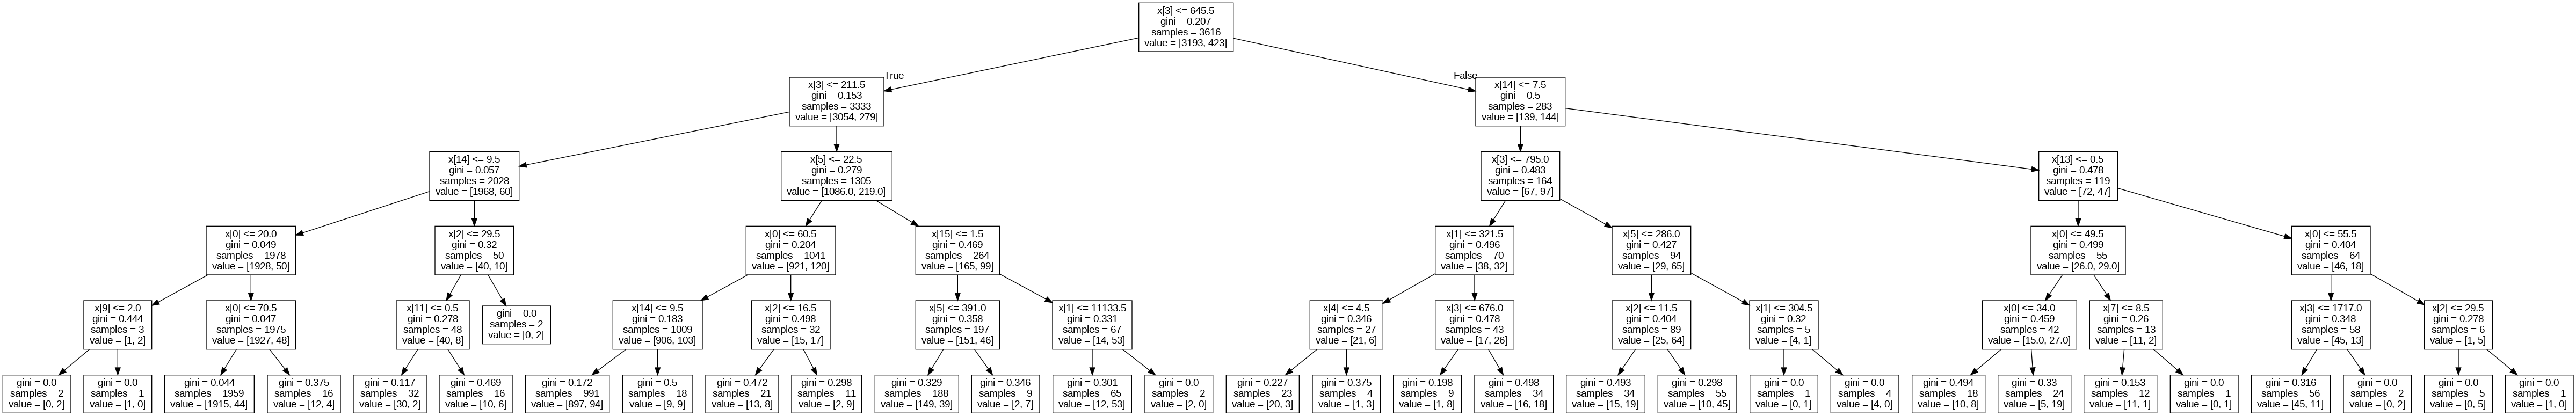

In [ ]:
Image('/content/dt.png')

#RANDOM FOREST

<Axes: >

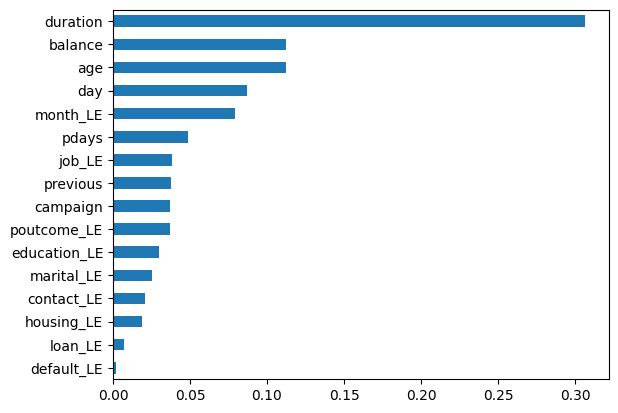

In [ ]:
#ВИЗУАЛИЗАЦИЯ ВЛИЯНИЯ ПРИЗНАКОВ
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

df_features=pd.Series(rf.feature_importances_,index=dataset.drop('y_LE',axis=1).columns)
df_features.sort_values(inplace=True)
df_features.plot.barh()

In [ ]:
#rf = RandomForestClassifier(n_estimators=10)
grid_params = {'n_estimators':[10,50,100],
               'criterion': ['gini','entropy'],
               'max_depth': [2,3,4],
               'min_samples_split':[2,3,4]
               }

#moretime
#grid search
rf = GridSearchCV(RandomForestClassifier(),
                        param_grid = grid_params,
                        scoring = 'precision',cv=5)

#train
rf.fit(X_train,y_train)

print(f"best accuracy= {rf.best_score_}")
print(f"best params= {rf.best_params_}")


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

best accuracy= 0.7999999999999999
best params= {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 100}


#LogiscticREG

In [ ]:
#logr = LogisticRegression()
grid_params = {'penalty': ['l2' ],
               'C': [ 1,2 ],
               'fit_intercept':[True,False]
               }

#moretime
#grid search
logr = GridSearchCV(LogisticRegression(),
                        param_grid = grid_params,
                        scoring = 'f1',cv=5)

#train
logr.fit(X_train,y_train)

print(f"best accuracy= {logr.best_score_}")
print(f"best params= {logr.best_params_}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

best accuracy= 0.28383963603239415
best params= {'C': 2, 'fit_intercept': False, 'penalty': 'l2'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

#Metrics

In [ ]:
model_list = [kNN,gaussNB,bernNB,dt,rf,logr]
model_names =['grid_kNN','grid_gaussNB','bernNB','dt','rf','logr']
def get_metrics(model_list,#list of models
                model_names, #names of models
        X_test,t_test#test array
                ):
    #списки под метрики
    accuracy_score_list = []
    precision_score_list =[]
    recall_score_list =[]
    f1_score_list =[]
    roc_auc_score_list =[]
    #полотно для плотли

    fig = go.Figure()
    fig.add_shape(type = 'line',
                  line = dict(dash = 'dash'),
                  x0 = 0,x1 = 1,y0 = 0, y1 = 1 )

    #идем в цикле по каждой модели в списке
    for i in range(len(model_list)):
        y_pred = model_list[i].predict(X_test)
        print(f"for model {model_names[i]}")
        print(f"Confusion matrix = ")
        print(confusion_matrix(y_test,y_pred,labels=[1,0]))
        print(f"accuracy score = {accuracy_score(y_test,y_pred)}")
        print(f"precision score = {precision_score(y_test,y_pred)}")
        print(f"recall score = {recall_score(y_test,y_pred)}")
        print(f"f1 score = {f1_score(y_test,y_pred)}")
        print(f"ROC_AUC = {roc_auc_score(y_test,y_pred)}")
        print('====================================')

        accuracy_score_list.append(accuracy_score(y_test,y_pred))
        precision_score_list.append(precision_score(y_test,y_pred))
        recall_score_list.append(recall_score(y_test,y_pred))
        f1_score_list.append(f1_score(y_test,y_pred))
        roc_auc_score_list.append(roc_auc_score(y_test,y_pred))

        #true / false positive
        fpr,tpr,_ = roc_curve(y_test,y_pred)#fpr,tpr
        auc_score = roc_auc_score(y_test,y_pred)

        #внести график на полотно
        name = f"{model_names[i]} (AUC = {auc_score})"#имя модели + значение площади
        fig.add_trace(go.Scatter(x=fpr,
                                 y=tpr,
                                 name = name,
                                 mode = 'lines'))

    #обновить полотно с fpr, tpr
    fig.update_layout(xaxis_title = 'FPR',
                      yaxis_title = 'TPR',
                      yaxis = dict(scaleanchor ="x",scaleratio = 1),
                      xaxis = dict(constrain = "domain"),
                      width = 900,height = 600
                      )

    ploted_figure = fig.show()
    #собираем общий датафрейм с метриками
    result_table = pd.DataFrame(index = model_names)
    result_table['accuracy'] = accuracy_score_list
    result_table['precision']= precision_score_list
    result_table['recall']=recall_score_list
    result_table['f1']= f1_score_list
    result_table['roc_auc']=roc_auc_score_list
    return result_table,ploted_figure

In [ ]:
result_table,ploted_figure = get_metrics(model_list,model_names,X_test,y_test)

for model grid_kNN
Confusion matrix = 
[[ 18  80]
 [ 22 785]]
accuracy score = 0.887292817679558
precision score = 0.45
recall score = 0.1836734693877551
f1 score = 0.2608695652173913
ROC_AUC = 0.5782060035910275
for model grid_gaussNB
Confusion matrix = 
[[ 36  62]
 [ 74 733]]
accuracy score = 0.8497237569060774
precision score = 0.32727272727272727
recall score = 0.3673469387755102
f1 score = 0.34615384615384615
ROC_AUC = 0.6378246465872593
for model bernNB
Confusion matrix = 
[[ 13  85]
 [ 38 769]]
accuracy score = 0.8640883977900552
precision score = 0.2549019607843137
recall score = 0.1326530612244898
f1 score = 0.174496644295302
ROC_AUC = 0.5427825405255039
for model dt
Confusion matrix = 
[[ 34  64]
 [ 29 778]]
accuracy score = 0.8972375690607735
precision score = 0.5396825396825397
recall score = 0.3469387755102041
f1 score = 0.422360248447205
ROC_AUC = 0.6555016058467996
for model rf
Confusion matrix = 
[[ 23  75]
 [ 18 789]]
accuracy score = 0.8972375690607735
precision score

for model grid_kNN
Confusion matrix = 
[[ 18  80]
 [ 22 785]]
accuracy score = 0.887292817679558
precision score = 0.45
recall score = 0.1836734693877551
f1 score = 0.2608695652173913
ROC_AUC = 0.5782060035910275
for model grid_gaussNB
Confusion matrix = 
[[ 36  62]
 [ 74 733]]
accuracy score = 0.8497237569060774
precision score = 0.32727272727272727
recall score = 0.3673469387755102
f1 score = 0.34615384615384615
ROC_AUC = 0.6378246465872593
for model bernNB
Confusion matrix = 
[[ 13  85]
 [ 38 769]]
accuracy score = 0.8640883977900552
precision score = 0.2549019607843137
recall score = 0.1326530612244898
f1 score = 0.174496644295302
ROC_AUC = 0.5427825405255039
for model dt
Confusion matrix = 
[[ 34  64]
 [ 29 778]]
accuracy score = 0.8972375690607735
precision score = 0.5396825396825397
recall score = 0.3469387755102041
f1 score = 0.422360248447205
ROC_AUC = 0.6555016058467996
for model rf
Confusion matrix = 
[[ 23  75]
 [ 18 789]]
accuracy score = 0.8972375690607735
precision score

<Axes: >

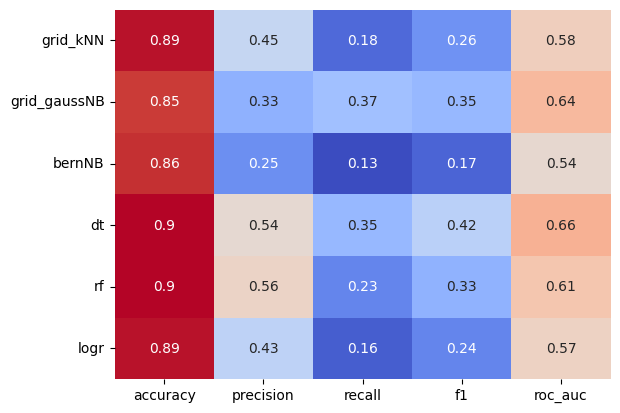

In [ ]:
result_table,ploted_figure = get_metrics(model_list,
                        model_names,
                        X_test,
                        y_test)
sns.heatmap(result_table,
            annot=True,
            cmap='coolwarm',
            cbar=False,)

In [ ]:
result_table

,accuracy,precision,recall,f1,roc_auc
grid_kNN,0.887293,0.450000,0.183673,0.260870,0.578206
grid_gaussNB,0.849724,0.327273,0.367347,0.346154,0.637825
bernNB,0.864088,0.254902,0.132653,0.174497,0.542783
dt,0.897238,0.539683,0.346939,0.422360,0.655502
rf,0.897238,0.560976,0.234694,0.330935,0.606195
logr,0.886188,0.432432,0.163265,0.237037,0.568622
